### Technical Assessment
#### Deadline: 1900hrs, 17th January 2022 Submissions after the deadline will not be accepted. Please submit the completed assessment early to ensure a smooth submission process.

#### Tasks

This technical assessment consists of two main parts:

1. Exploratory Data Analysis (EDA)
2. End-to-end Machine Learning Pipeline (MLP)

You are to attempt both parts and package a submission containing deliverables for each of the tasks.

Task 1 - Exploratory Data Analysis (EDA)
Using the dataset specified in the Data section below, conduct an EDA and create an <u>interactive</u> notebook in Python that can be used as a <u> presentation </u> to explain the findings of your analysis. It should contain <u> appropriate visualisations</u> and explanations to assist readers in understanding <u> how these elaborations are arrived at </u> as well as their implications.

Deliverable: Notebook in Python: An `.ipynb` file named `eda.ipynb`.
Evaluation
        In the submitted notebook, you are required to:
1. Outline the steps taken in the EDA process
2. Explain the purpose of each step
3. Explain the conclusions drawn from each step
4. Explain the interpretation of the various statistics generated and how they impact your analysis
5. Generate clear, meaningful and understandable visualisations that support your findings 
6. Organise the notebook so that is it clear and easy to understand

You will be assessed on the
- usefulness and clarity of visualisations, 
- accuracy and depth of your insights, 
- presentation flow, and 
- structure of your analysis.

Please note that your submission will be heavily penalised for any of the following conditions:
1. .ipynb missing from submission folder
2. .ipynb cannot be opened on Jupyter Notebook
3. Explanations missing or unclear in the submitted .ipynb

## Objectives
The objective is to predict the survival of coronary artery disease patients using the dataset
provided to help doctors to formulate preemptive medical treatments. In your submission, you are to evaluate at least 3 suitable models for estimating the patients’ survivals.

## Dataset description

The dataset contains the medical records of coronary artery disease patients for a particular
hospital. Do note that there could be synthetic features in the dataset. Hence, please ensure that you state and verify any assumptions that you make.

#let's begin


In [39]:
#import requisite packages

import sqlite3
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

In [40]:
# Create your connection.
database = "data/survive.db"
cnx = sqlite3.connect(database)
df = pd.read_sql(""" SELECT * FROM survive""", cnx)

In [41]:
#check to see if df loaded correctly
df.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue


In [42]:
df.shape

(15000, 16)

In [43]:
#check for duplicates
dupes= df[df.duplicated()]
print(dupes)

Empty DataFrame
Columns: [ID, Survive, Gender, Smoke, Diabetes, Age, Ejection Fraction, Sodium, Creatinine, Platelets, Creatine phosphokinase, Blood Pressure, Hemoglobin, Height, Weight, Favorite color]
Index: []


In [44]:
#so we see there are no duplicates
#now running some EDA on the dataset, just to see what we're dealing with.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      15000 non-null  object 
 1   Survive                 15000 non-null  object 
 2   Gender                  15000 non-null  object 
 3   Smoke                   15000 non-null  object 
 4   Diabetes                15000 non-null  object 
 5   Age                     15000 non-null  int64  
 6   Ejection Fraction       15000 non-null  object 
 7   Sodium                  15000 non-null  int64  
 8   Creatinine              14501 non-null  float64
 9   Platelets               15000 non-null  float64
 10  Creatine phosphokinase  15000 non-null  int64  
 11  Blood Pressure          15000 non-null  int64  
 12  Hemoglobin              15000 non-null  float64
 13  Height                  15000 non-null  int64  
 14  Weight                  15000 non-null

In [46]:
df.describe()

,Age,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight
count,15000.000000,15000.000000,14501.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,57.428467,136.604267,1.410195,263096.01649,580.151800,103.676667,12.910667,159.475200,69.340467
std,23.411173,4.364890,1.044535,98056.33034,955.418765,39.700138,2.500152,17.344439,25.298287
min,-95.000000,113.000000,0.500000,25100.00000,23.000000,40.000000,9.000000,130.000000,19.000000
25%,50.000000,134.000000,0.900000,211000.00000,115.000000,70.000000,10.700000,144.000000,50.000000
50%,60.000000,137.000000,1.100000,262000.00000,250.000000,100.000000,12.700000,160.000000,66.000000
75%,70.000000,140.000000,1.400000,304000.00000,582.000000,137.000000,15.100000,174.000000,87.000000
max,95.000000,148.000000,9.400000,850000.00000,7861.000000,179.000000,17.500000,189.000000,141.000000


In [47]:
#deal with empty cells, NaNs if any. Also pull some random slices, and the tail, just to eyeball the data
print ("this is the shape of the dataset: \n\n", df.shape)
print ("\n these are empty areas: \n\n ", df.isnull().sum())
print ("\n these are cells with NaN: \n\n", df.isna().sum())
print ("\n this is a random sampling of the dataset: \n\n", df.sample(25))
print ("\n this is the tail: \n\n", df.tail(20))

this is the shape of the dataset: 

 (15000, 16)

 these are empty areas: 

  ID                          0
Survive                     0
Gender                      0
Smoke                       0
Diabetes                    0
Age                         0
Ejection Fraction           0
Sodium                      0
Creatinine                499
Platelets                   0
Creatine phosphokinase      0
Blood Pressure              0
Hemoglobin                  0
Height                      0
Weight                      0
Favorite color              0
dtype: int64

 these are cells with NaN: 

 ID                          0
Survive                     0
Gender                      0
Smoke                       0
Diabetes                    0
Age                         0
Ejection Fraction           0
Sodium                      0
Creatinine                499
Platelets                   0
Creatine phosphokinase      0
Blood Pressure              0
Hemoglobin                  0
Height  

In [48]:
#For some columns, we expect only a few values e.g. 0 or 1 for "Survive". Let's do a quick check to see if the columns indeed comply.

df.nunique()

ID                        14042
Survive                       4
Gender                        2
Smoke                         4
Diabetes                      3
Age                          87
Ejection Fraction             5
Sodium                       27
Creatinine                   40
Platelets                   176
Creatine phosphokinase      208
Blood Pressure              139
Hemoglobin                   86
Height                       60
Weight                      123
Favorite color                6
dtype: int64

Some anomalies we see from above:
    - From unique counts we see we have more values in some columns than we're expecting. Eyeballing the data too we can see why; "Yes" in 'Survive' column, when there should be 0 or 1. For ID 26M6N1. We see this again for ID 'LY7RQJ'; No instead of '0'.So, we need to check the data in each column corresponds to the right type.We should have 2 values for "Survive", "Gender", "Smoke", and 3 for "Diabetes". We're not sure what we have for "Ejection Fraction" and "Favorite color", so let's look at the unique values and see if any values can be consolidated.
    - We can see 499 cells in "Creatinine" are missing, so we will decide how to impute missing values by plotting the column next.
    - Some words randomly capitalised. E.g. under 'Smoke', for ID 50UWHW, we have 'YES' but for others we have 'yes'. It would be best to standardise the words, so that regardless of what future modelling we do, the same word doesn't get mapped multiple times or along different axes just because of the capitalisation.
    - Standard deviation in weight and age is 20+, which seems rather high, and warrants a seocnd look.
    - There is a minimum age of -95, which warrants a second look since that's impossible. Additionally, there is a 19 kg respondent in the dataset under weight, would be good to check it's a young/small person else it might be erroneous.



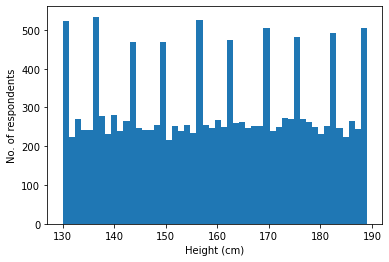

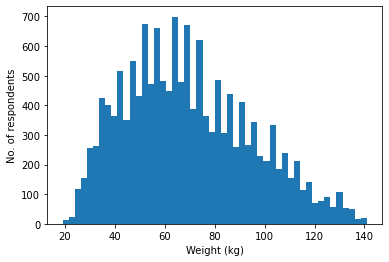

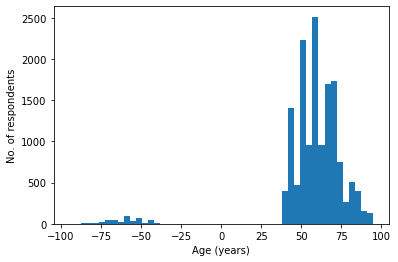

In [49]:
#first, let's quickly look at the outlier data in height, weight, and age.
plt.hist(df["Height"], bins = 50)
plt.xlabel('Height (cm)')
plt.ylabel('No. of respondents')
plt.show()

plt.hist(df["Weight"], bins = 50)
plt.xlabel('Weight (kg)')
plt.ylabel('No. of respondents')
plt.show()

plt.hist(df["Age"], bins = 50)
plt.xlabel('Age (years)')
plt.ylabel('No. of respondents')
plt.show()


In [50]:
#let's address the negative ages first. We filter the data to see how many rows are affected.
unborn = df[df['Age']<0]
unborn.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
14,NQRZFG,0,Male,No,Normal,-40,Low,137,0.9,255000.0,129,82,9.1,140,37,white
24,W5R4KE,1,Male,Yes,Normal,-85,Low,132,1.0,243000.0,5882,79,15.2,160,84,red
112,1EQGA7,1,Male,No,Normal,-45,Low,135,1.6,126000.0,582,130,12.7,177,69,black
119,DLJSRR,0,Female,No,Diabetes,-58,Normal,137,0.8,300000.0,200,53,9.1,155,71,yellow


In [51]:
#it's likely these ages are correct, but have accidentally been recorded as negative. Let's drop them from the dataset.
df = df[df['Age']>0]
df.describe()

,Age,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight
count,14570.000000,14570.000000,14087.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000
mean,60.895127,136.602402,1.409504,262977.280325,579.244749,103.672615,12.913164,159.532121,69.390323
std,11.884924,4.369474,1.041478,98143.933977,956.510221,39.698862,2.501588,17.323368,25.335599
min,40.000000,113.000000,0.500000,25100.000000,23.000000,40.000000,9.000000,130.000000,19.000000
25%,51.000000,134.000000,0.900000,211000.000000,115.000000,70.000000,10.700000,144.000000,50.000000
50%,60.000000,137.000000,1.100000,262000.000000,250.000000,100.000000,12.700000,160.000000,66.000000
75%,70.000000,140.000000,1.400000,304000.000000,582.000000,137.000000,15.100000,174.000000,87.000000
max,95.000000,148.000000,9.400000,850000.000000,7861.000000,179.000000,17.500000,189.000000,141.000000


In [52]:
#now, let's look at the top 20 most common values for height and weight to see if we can explain the spikes in histograms, or are they just random
print ("the most common weights are \n\n ", df['Weight'].value_counts()[:20].index.tolist())
print ("the most common heights are \n\n", df['Height'].value_counts()[:20].index.tolist())

the most common weights are 

  [64, 52, 59, 55, 60, 66, 67, 70, 56, 54, 50, 62, 74, 68, 61, 69, 57, 63, 58, 53]
the most common heights are 

 [157, 137, 138, 140, 170, 173, 188, 160, 133, 178, 174, 177, 142, 165, 183, 176, 186, 131, 164, 148]


In [53]:
#the weights and heights seem to be random, and indicative of real data (no obvious errors), so let's proceed.

In [55]:
#Let's also take a quick look at our 19kg datapoint, and confirm it's a young person
df_19 = df[df['Weight']==19]
df_19

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
358,VYBQR1,0,Male,Yes,Normal,50,L,136,1.6,395000.0,196,114,12.1,130,19,green
7825,VVKFFW,0,Male,Yes,Normal,50,Low,136,1.6,395000.0,196,40,13.8,130,19,blue
13410,QKLLAS,0,Male,Yes,Normal,50,Low,136,NaN,395000.0,196,105,17.0,130,19,blue


In [56]:
#So these are not young people, but they didn't survive. Furthermore they are smokers. It's unclear if they were emaciated at the point of death, or if they had other issues; we will leave the data as is for now since we don't know enough to remove it.

In [18]:
df["Survive"].unique()

array(['0', '1', 'No', 'Yes'], dtype=object)

In [19]:
df["Smoke"].unique()

array(['Yes', 'No', 'NO', 'YES'], dtype=object)

In [20]:
df["Ejection Fraction"].unique()

array(['Low', 'Normal', 'High', 'L', 'N'], dtype=object)

In [21]:
df["Favorite color"].unique()

array(['green', 'black', 'white', 'blue', 'red', 'yellow'], dtype=object)

In [22]:
#so it looksl ike "Favorite color as a column is okay, because the values are indeed all unique. However, Ejection Fraction should be 3 values; low medium and high. We will adjust this next along with other column values that should be adjusted.

In [23]:
df["Survive"].replace({"No": "0", "Yes": "1"}, inplace=True)
df["Smoke"].replace({"NO": "No", "YES": "Yes"}, inplace=True)
df["Ejection Fraction"].replace({"N": "Normal", "L": "Low"}, inplace=True)

In [24]:
print(df["Survive"].unique())
print(df["Smoke"].unique())
print(df["Ejection Fraction"].unique())

['0' '1']
['Yes' 'No']
['Low' 'Normal' 'High']


In [25]:
df.nunique()

ID                        13663
Survive                       2
Gender                        2
Smoke                         2
Diabetes                      3
Age                          46
Ejection Fraction             3
Sodium                       27
Creatinine                   40
Platelets                   176
Creatine phosphokinase      208
Blood Pressure              139
Hemoglobin                   86
Height                       60
Weight                      123
Favorite color                6
dtype: int64

In [26]:
#The dataset now looks more in line with what we're expecting. Note; we inteionally have not yet converted words to numbers; we will do this at a later stage during ML preprocessing. Let's visualise the data now to see if we pick up anything else.

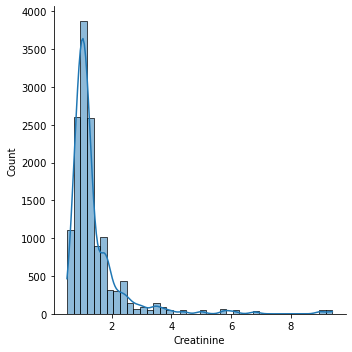

In [27]:
sns.displot(data=df, x="Creatinine", bins = 40, kde = True)

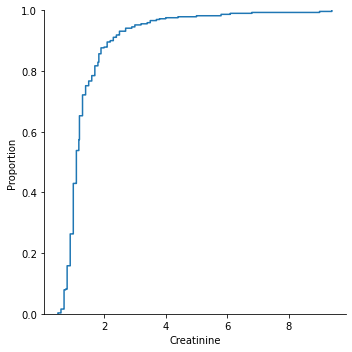

In [28]:
sns.displot(data=df, x="Creatinine", kind="ecdf")

In [29]:
#so we can see this data is positively skewed, which means we shouldn't use the mean to impute values. We will default to using Median to impute values, but let's quickly check if there's a correlation with another numerical column that might help us get a better imputation (if so, we can sort by that column, and take means of values before and after the missing cell in Creatinine)

<AxesSubplot:>

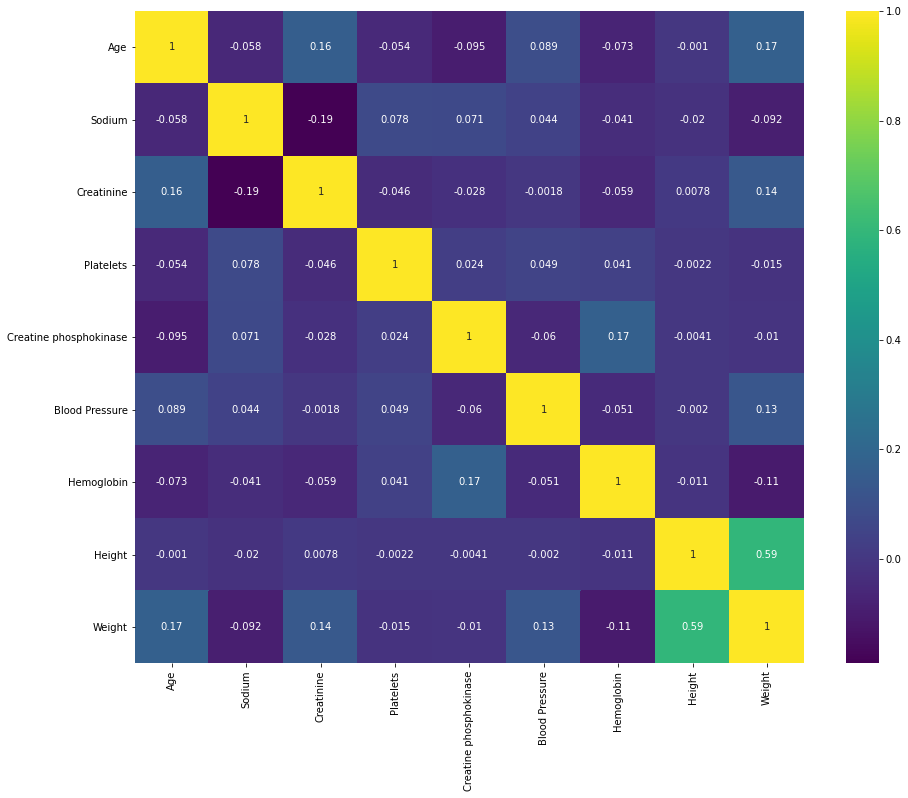

In [30]:
cols_w_numbers=['Survive','Age','Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure',
'Hemoglobin', 'Height', 'Weight']
df_num_correl=df[cols_w_numbers]
plt.figure(figsize=(15,12))
sns.heatmap(df_num_correl.corr(), cmap = 'viridis', annot=True)

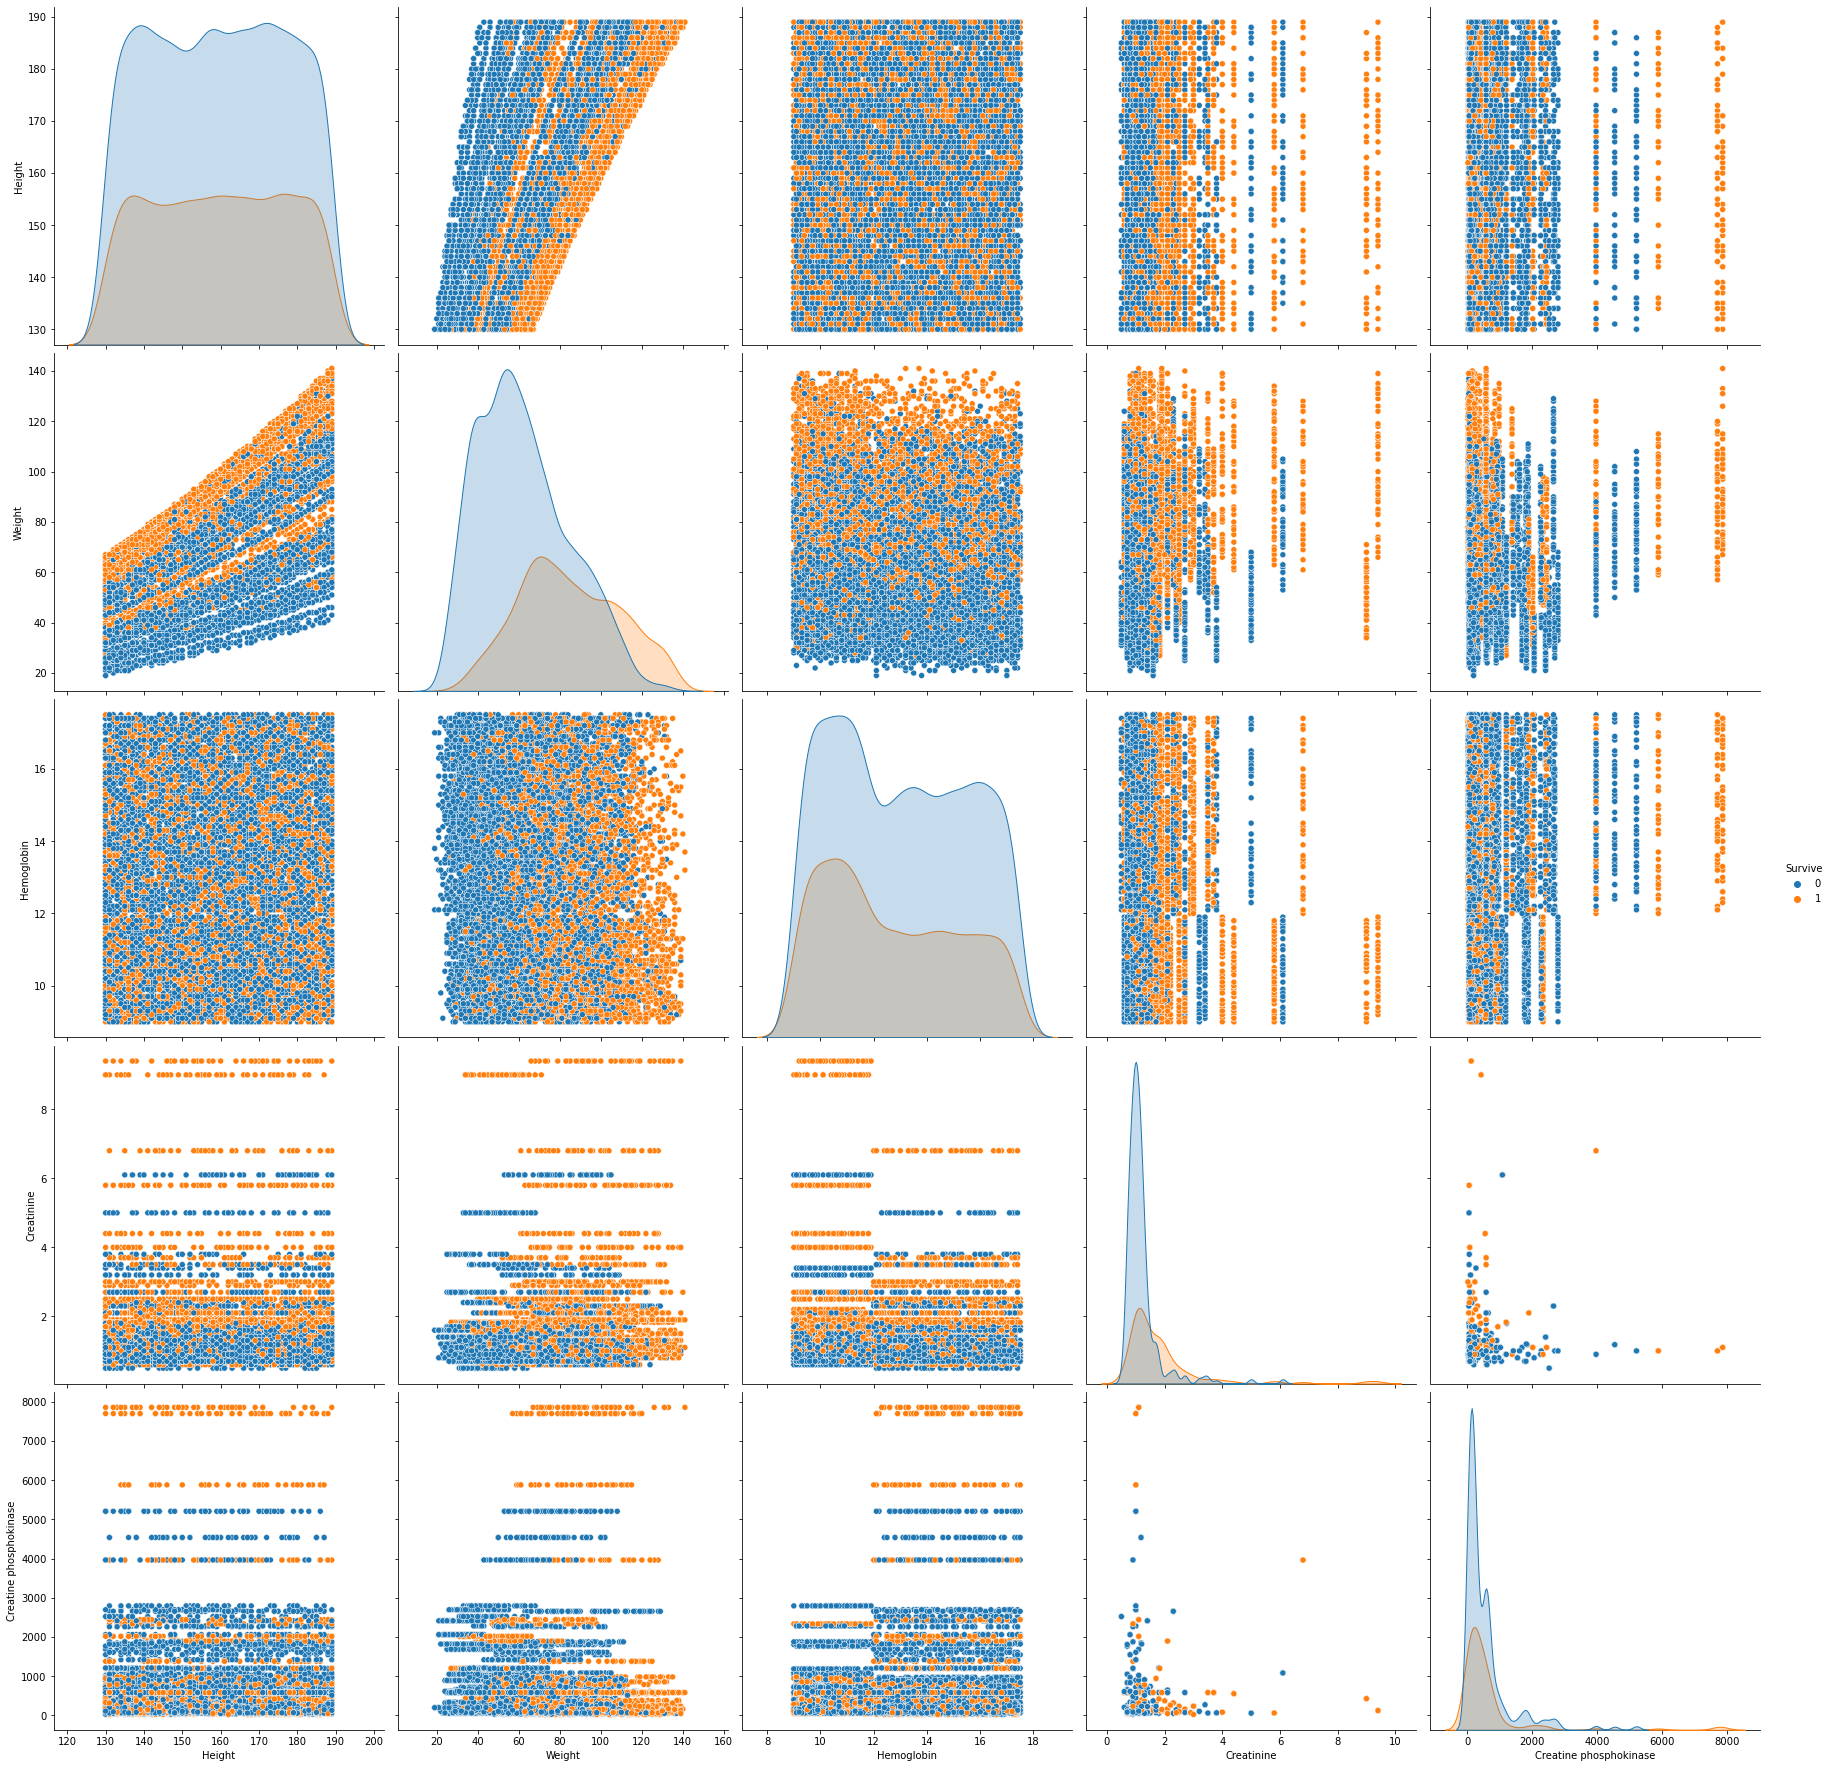

In [31]:
#out of curiousity, let's do a pairplot plot based on the most correlated pairs we see above; we'll drop the other columns (since the graph gets too big otherwise). This is in case any other relationships jump out.
cols_pairplot=['Survive','Height', 'Weight', 'Hemoglobin', 'Creatinine', 'Creatine phosphokinase']
df_reduced=df[cols_pairplot]
graphs = sns.pairplot(df_reduced, height = 5, hue='Survive')
#graphs.add_legend()
#plt.setp(graphs.get_legend().get_texts(), fontsize='10')

In [ ]:
#some interesting relationships noticed, and clear separation between Survivor and non-survivor in Hemoglobin <> Weight and Height <> Weight charts, but we already saw this in the correlation heatmap. So, let's move on to the next step.

In [32]:
#filling the empty creatinine values with the median in the column.
df['Creatinine']=df['Creatinine'].fillna(df['Creatinine'].median())
#check if any null left
df.isnull().sum()

ID                        0
Survive                   0
Gender                    0
Smoke                     0
Diabetes                  0
Age                       0
Ejection Fraction         0
Sodium                    0
Creatinine                0
Platelets                 0
Creatine phosphokinase    0
Blood Pressure            0
Hemoglobin                0
Height                    0
Weight                    0
Favorite color            0
dtype: int64

In [34]:
#Column 'ID' is arbitrary and unlikely to contribute much to results. We should drop it.
df.drop(['ID'], axis =1)

,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
4,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue
5,1,Male,No,Normal,55,Low,138,1.1,314000.0,2017,88,16.5,176,58,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,298,109,11.8,178,51,blue
14996,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,231,141,14.6,171,114,green
14997,0,Female,No,Normal,61,Low,141,0.9,229000.0,84,173,9.2,156,71,blue
14998,0,Male,No,Normal,77,Low,137,1.1,406000.0,109,154,11.3,130,32,red


In [32]:
#now finally, let's rename the "Survive' column to the Target column, just out of convention for ml work.

In [33]:
df.rename(
    columns={'Survive': 'Target'},
    inplace=True
)

# Print out the first 2 rows just to check
df.head(2)
print ("ready for the next step!")

ready for the next step!
